In [9]:
import sys
sys.path.append('../')
sys.path.append('../splinedistm')

import matplotlib.pyplot as plt
import numpy as np

from csbdeep.utils import normalize
from glob import glob
from skimage import io
from splinedist.models import SplineDist2D
from stardist.matching import matching_dataset
from tqdm import tqdm

from utils import show_test_images, taus

In [2]:
image_dir = f'../images'
hela_dir = f'{image_dir}/fluo-ND2L-HeLa'
merfish_dir = f'{image_dir}/merfish'

model_dir = 'models'

In [3]:
# Read test images and masks, normalize test images
hela_X_test_names = sorted(glob(f'{hela_dir}/test/images/*.tif'))
hela_X_test = [normalize(img, 1, 99.8, axis=(0, 1)) for img in list(map(io.imread, hela_X_test_names))]
hela_Y_test_names = sorted(glob(f'{hela_dir}/test/masks/*.tif'))
hela_Y_test = list(map(io.imread, hela_Y_test_names))

# 8 images (20%) chosen for test
merfish_X_test_names = sorted(glob(f'{merfish_dir}/test/images/*.tif'))
merfish_X_test = [normalize(img, 1, 99.8, axis=(0, 1)) for img in list(map(io.imread, merfish_X_test_names))]
merfish_Y_test_names = sorted(glob(f'{merfish_dir}/test/masks/*.tif'))
merfish_Y_test = list(map(io.imread, merfish_Y_test_names))

In [4]:
# Load from disk
splinedist_hela_model = SplineDist2D(None, name='splinedist_hela', basedir=model_dir) 

Loading network weights from 'weights_best.h5'.
Couldn't load thresholds from 'thresholds.json', using default values. (Call 'optimize_thresholds' to change that.)
Using default values: prob_thresh=0.5, nms_thresh=0.4.


In [5]:
hela_Y_pred = [splinedist_hela_model.predict_instances(x, n_tiles=splinedist_hela_model._guess_n_tiles(x), show_tile_progress=False)
              for x in tqdm(hela_X_test)]

100%|██████████| 92/92 [10:07<00:00,  6.61s/it]


In [10]:
hela_Y_pred_labels = [pred[0] for pred in hela_Y_pred]
hela_stats = [matching_dataset(hela_Y_test, hela_Y_pred_labels, thresh=t, show_progress=False) for t in taus]

In [11]:
hela_stats

[DatasetMatching(criterion='iou', thresh=0.1, fp=3192, tp=24593, fn=228, precision=0.885117869353968, recall=0.9908142298859837, accuracy=0.8779138257237711, f1=0.9349884043645211, n_true=24821, n_pred=27785, mean_true_score=0.8987596557470637, mean_matched_score=0.9070919942787732, panoptic_quality=0.8481204963425415, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.2, fp=3198, tp=24587, fn=234, precision=0.8849019254993702, recall=0.9905724990935095, accuracy=0.8775116884970913, f1=0.9347602935026423, n_true=24821, n_pred=27785, mean_true_score=0.8987209630985068, mean_matched_score=0.907274292311711, panoptic_quality=0.848083983768697, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.3, fp=3207, tp=24578, fn=243, precision=0.8845780097174735, recall=0.9902099029047984, accuracy=0.8769088054802341, f1=0.934418127209824, n_true=24821, n_pred=27785, mean_true_score=0.8986335792489001, mean_matched_score=0.9075182712400094, panoptic_quality=0.8480015234207866, by_i

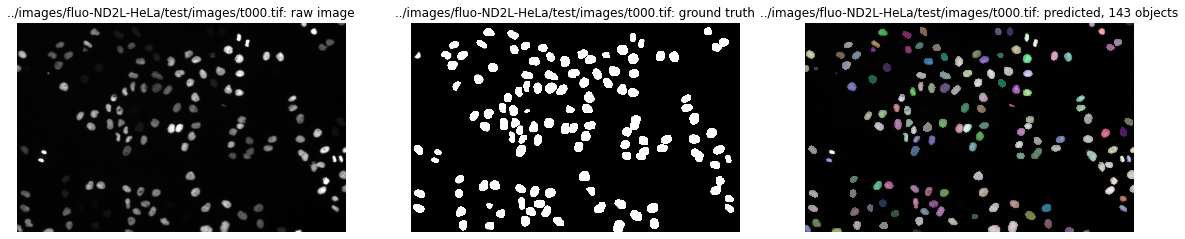

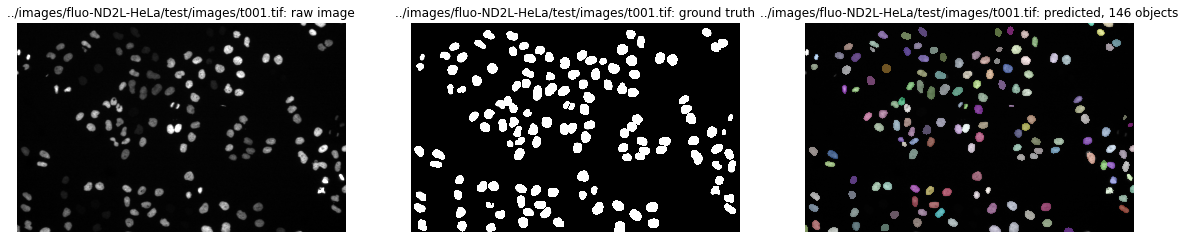

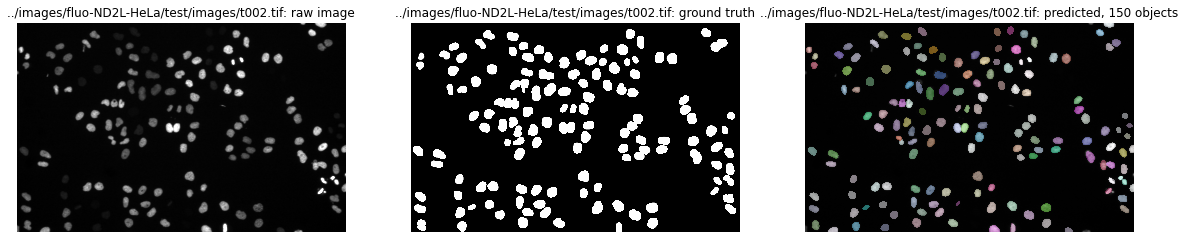

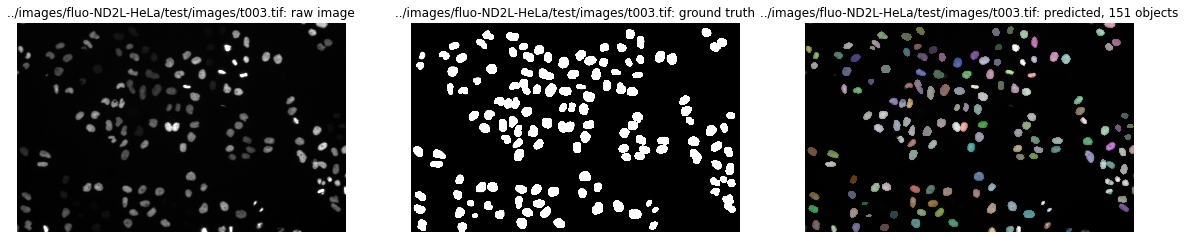

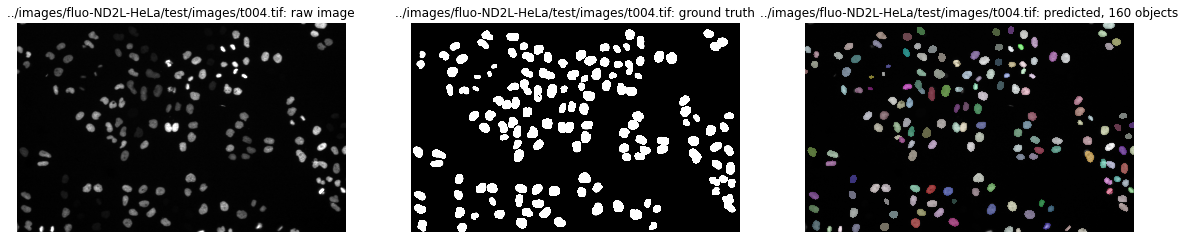

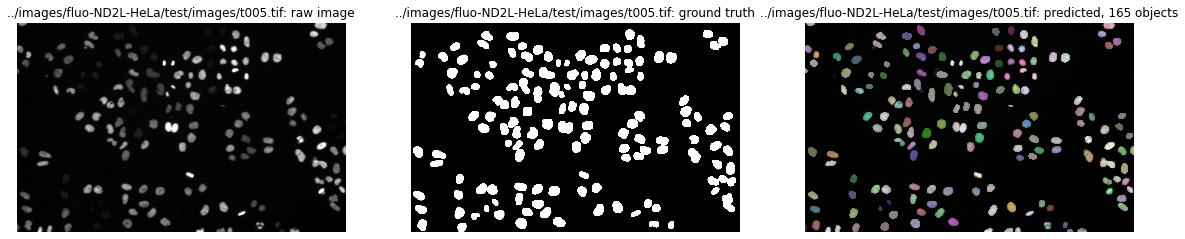

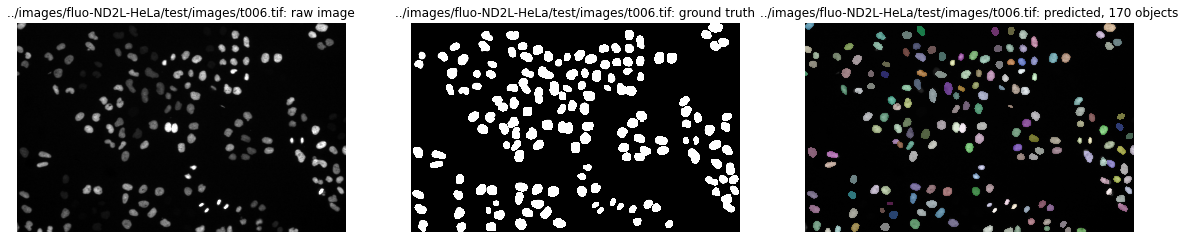

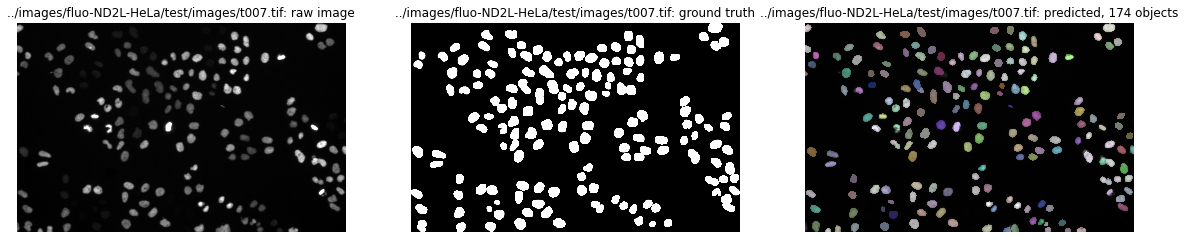

In [12]:
# Show first 8 predictions
show_test_images(hela_X_test, hela_Y_test, hela_Y_pred, hela_X_test_names, 8)

In [13]:
# Try running the model on MERFISH images
# TODO: Didn't finish running, try again
merfish_Y_pred = [splinedist_hela_model.predict_instances(x, n_tiles=splinedist_hela_model._guess_n_tiles(x), show_tile_progress=False)
              for x in tqdm(merfish_X_test)]

  0%|          | 0/8 [00:00<?, ?it/s]

In [ ]:
show_test_images(merfish_X_test, merfish_Y_test, merfish_Y_pred, merfish_X_test_names)